In [3]:
import pandas as pd
from datetime import datetime
from fastapi.middleware.cors import CORSMiddleware
from fastapi import FastAPI
from energy_price_pred.energypricepred import *
import json
from market.ml_logic.optimiser_model_variable_inputs_copy_ri2 import *

# from market.models import price_model
# from market.ml_logic.cons_model import *
# from market.ml_logic.energy_price_model import *
# from market.ml_logic.gen_model_efficient import *

import matplotlib.pylab as plt

In [4]:
app = FastAPI()

@app.get("/predict")
def predict(battery_size: int, # 5 total size
            battery_charge: int): # 1 initial charge amount
    """predicting Buy/Sell price as first pass"""

    # date=pd.Timestamp(date)
    output_keys = ['SalePrice_p/kwh', 'PurchasePrice_p/kwh', 'Generation_kwh', 'Consumption_kwh']

    res = run_full_model_api(int(battery_size), int(battery_charge))

    # res_dict = json.loads(res)

    res_pred_saleprice = pd.DataFrame.from_dict(res['predicted_data']['SalePrice_p/kwh']) #pd.DataFrame.from_dict(res['predicted_data'])
    res_pred_all= res['predicted_data']#pd.DataFrame.from_dict(res['predicted_data'])
    res_opt_batt= pd.DataFrame(res['optimised_battery_storage'])
    res_opt_buyprice= pd.DataFrame(res['optimised_energy_purchase_price'])
    res_opt_sellprice= pd.DataFrame(res['optimised_energy_sold_price'])
    res_opt_baseprice= pd.DataFrame(res['baseline_hourly_price'])
    res_weather_code = res['weather_code']
    key_list=[]
    value_list=[]
    data_saleprice = res_pred_saleprice['SalePrice_p/kwh']
    for key, value in data_saleprice.items():
        key_list.append(key)
        value_list.append(value)
    #return {'res':f'key is {key_list[0]} of type {type(key_list[0])} and value is {value_list[0]}'} #{"res columns": res_pred_saleprice}
    output = {'prediction_data': res_pred_all, 'res_opt_batt': res_opt_batt, 'res_opt_buyprice': res_opt_buyprice,
              'res_opt_sellprice': res_opt_sellprice, 'res_opt_baseprice': res_opt_baseprice, 'res_weather_code': res_weather_code}
    return output# {'keys': str(res.keys())}

@app.get("/")
def root():
    return {'greeting': 'Hello there'}

In [5]:
def predict_test(battery_size: int, # 5 total size
            battery_charge: int): # 1 initial charge amount
    """predicting Buy/Sell price as first pass"""

    # date=pd.Timestamp(date)
    output_keys = ['SalePrice_p/kwh', 'PurchasePrice_p/kwh', 'Generation_kwh', 'Consumption_kwh']

    res = run_full_model_api(int(battery_size), int(battery_charge))

    # res_dict = json.loads(res)

    res_pred_saleprice = pd.DataFrame.from_dict(res['predicted_data']['SalePrice_p/kwh']) #pd.DataFrame.from_dict(res['predicted_data'])
    res_pred_all= res['predicted_data']#pd.DataFrame.from_dict(res['predicted_data'])
    res_opt_batt= pd.DataFrame(res['optimised_battery_storage'])
    res_opt_buyprice= pd.DataFrame(res['optimised_energy_purchase_price'])
    res_opt_sellprice= pd.DataFrame(res['optimised_energy_sold_price'])
    res_opt_baseprice= pd.DataFrame(res['baseline_hourly_price'])
    res_weather_code = res['weather_code']
    key_list=[]
    value_list=[]
    data_saleprice = res_pred_saleprice['SalePrice_p/kwh']
    for key, value in data_saleprice.items():
        key_list.append(key)
        value_list.append(value)
    #return {'res':f'key is {key_list[0]} of type {type(key_list[0])} and value is {value_list[0]}'} #{"res columns": res_pred_saleprice}
    output = {'prediction_data': res_pred_all, 'res_opt_batt': res_opt_batt, 'res_opt_buyprice': res_opt_buyprice,
              'res_opt_sellprice': res_opt_sellprice, 'res_opt_baseprice': res_opt_baseprice, 'res_weather_code': res_weather_code}
    return output# {'keys': str(res.keys())}


In [6]:
output = predict_test(5, 1)
output

Cost forecasted
Energy consumption forecasted


2024-03-30 07:16:04.447731: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-30 07:16:04.448114: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


2024-03-30 07:16:05.051598: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Model optimsied
Basline model running


{'prediction_data':                      SalePrice_p/kwh  PurchasePrice_p/kwh  Generation_kwh  \
 ds                                                                          
 2024-03-28 15:00:00         9.433667            18.867334             0.0   
 2024-03-28 16:00:00        12.699970            25.399940             0.0   
 2024-03-28 17:00:00        14.529362            29.058723             0.0   
 2024-03-28 18:00:00        13.720664            27.441327             0.0   
 2024-03-28 19:00:00        10.766625            21.533250             0.0   
 ...                              ...                  ...             ...   
 2024-04-04 10:00:00         6.744668            13.489337             0.0   
 2024-04-04 11:00:00         6.245182            12.490365             0.0   
 2024-04-04 12:00:00         5.187862            10.375724             0.0   
 2024-04-04 13:00:00         4.584535             9.169071             0.0   
 2024-04-04 14:00:00         5.629086        

In [1]:
!pwd

/home/rahuliyer/code/hramzan01/market


In [13]:
df = output['res_weather_code']
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2024-03-28 15:00:00 to 2024-04-04 14:00:00
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   weather_code  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


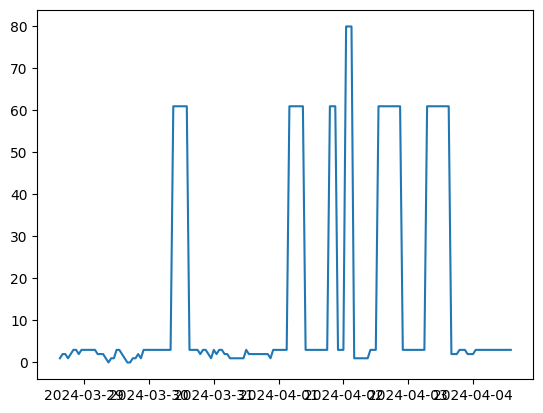

In [12]:
plt.plot(df.index, df['weather_code'])

In [16]:
output['prediction_data'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2024-03-28 15:00:00 to 2024-04-04 14:00:00
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SalePrice_p/kwh      168 non-null    float64
 1   PurchasePrice_p/kwh  168 non-null    float64
 2   Generation_kwh       168 non-null    float64
 3   Consumption_kwh      168 non-null    float64
dtypes: float64(4)
memory usage: 6.6 KB


In [17]:
df_reset = df.reset_index()
df_reset.head()

,ds,weather_code
0,2024-03-28 15:00:00,1
1,2024-03-28 16:00:00,2
2,2024-03-28 17:00:00,2
3,2024-03-28 18:00:00,1
4,2024-03-28 19:00:00,2


In [26]:
output['res_weather_code']['weather_code']

ds
2024-03-28 15:00:00    1
2024-03-28 16:00:00    2
2024-03-28 17:00:00    2
2024-03-28 18:00:00    1
2024-03-28 19:00:00    2
                      ..
2024-04-04 10:00:00    3
2024-04-04 11:00:00    3
2024-04-04 12:00:00    3
2024-04-04 13:00:00    3
2024-04-04 14:00:00    3
Name: weather_code, Length: 168, dtype: int64

In [31]:
df_reset_drop = df_reset.drop(columns=['ds'])
df_reset_drop['weather_code'].astype(int)

0      1
1      2
2      2
3      1
4      2
      ..
163    3
164    3
165    3
166    3
167    3
Name: weather_code, Length: 168, dtype: int64

In [33]:
df_reset_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   weather_code  168 non-null    int64
dtypes: int64(1)
memory usage: 1.4 KB


In [34]:
df_reset_drop

,weather_code
0,1
1,2
2,2
3,1
4,2
...,...
163,3
164,3
165,3
166,3
